Copyright - Mayank Raj(B19CSE053)

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

from random import seed
from random import random
from math import exp
from random import randrange
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import sqrt

In [126]:
np.random.seed
df=pd.read_csv('IRIS.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [127]:
species = preprocessing.LabelEncoder()
df['species'] = species.fit_transform(df.iloc[:,-1])
df = df.drop("Species",axis=1)
display(df.head())
df1=df.iloc[:,[1,2,3,4]]
y=df.iloc[:,-1]
display(df1)
display(y)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

We will make a class for k means just as the neural network and implement functions in it.
Copyright - Mayank Raj(B19CSE053)

In [128]:
def eulcid_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def manhattan_distance(p1,p2):
	return sum(abs(e1-e2) for e1, e2 in zip(p1,p2))

In [129]:
class k_means:
    def __init__(self,data,k,max_iter=100,dist=eulcid_distance):
        self.dist=dist
        self.data=data
        self.k=k# number of clusters
        self.max_iter=max_iter
        self.centroids=[]
        self.clusters=[[] for i in range(self.k)]

    def eulci_distance(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))

    def manhattan_distance(self,p1,p2):
	    return sum(abs(e1-e2) for e1, e2 in zip(p1,p2))

    def find_closest_centroid(self,val,centroids):
        d=[]
        for i in centroids:
            d.append(self.eulci_distance(val,i))
        return np.argmin(d)
    
    def init_clusters(self, centroids):
        clusters = [[] for j in range(self.k)]
        for index, val in enumerate(self.x):
            centroid_index = self.find_closest_centroid(val, centroids)
            clusters[centroid_index].append(index)
        return clusters
    def compute_centroids(self,clusters):
        c=np.zeros((self.k,self.n_features))
        for index,value in enumerate(clusters):
            mean=np.mean(self.x[value],axis=0)
            c[index]=mean
        return c
    def converge(self,c1,c2):
        distances = [self.dist(c1[i], c2[i]) for i in range(self.k)]
        return sum(distances) == 0


    def algorithm(self,x):
        self.x=x
        self.n_samples,self.n_features=x.shape
        init_smp=np.random.choice(self.n_samples,self.k,replace=False)
        self.centroids=[self.x[i] for i in init_smp]

        for i in range(self.max_iter):
            self.clusters=self.init_clusters(self.centroids)
            # self.plot()
            c_old=self.centroids
            self.centroids=self.compute_centroids(self.clusters)
            if self.converge(c_old,self.centroids):
                break
            # self.plot()
        return self.labels(self.clusters)
    
    def labels(self,clusters):
        l=np.empty(self.n_samples)
        print(clusters)
        #label array to get actual label
        for index,val in enumerate(clusters):
            for j in val:
                l[j]=index
    
        self.l=l
        return l

        
        

                
       

     
            






In [130]:
def accuracy53(actual, pred):
    c = 0
    tot=0
    for i in range(len(actual)):
        tot+=1
        if actual[i] == pred[i]:
            c += 1
    return ((c)/(1.0*tot))*100.0

Training the model

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], [51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]]


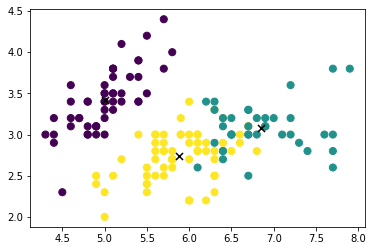

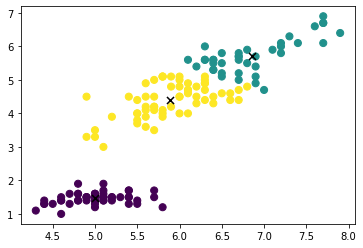

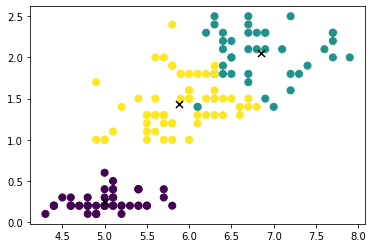

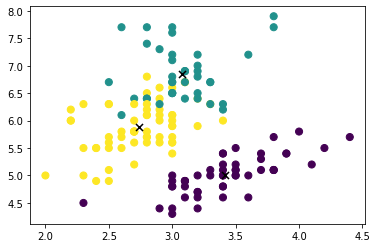

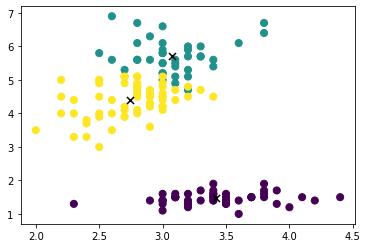

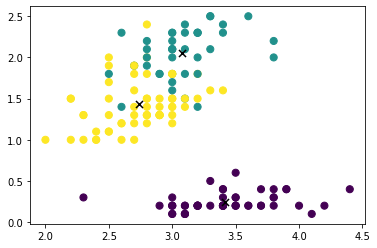

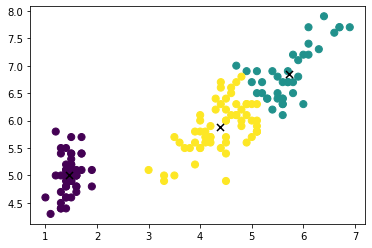

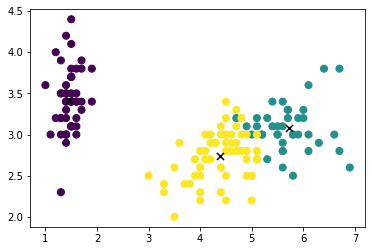

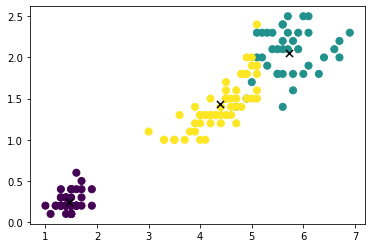

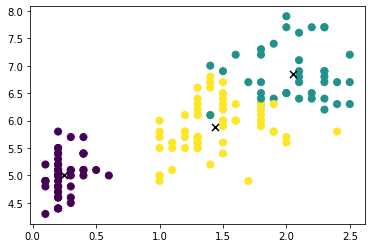

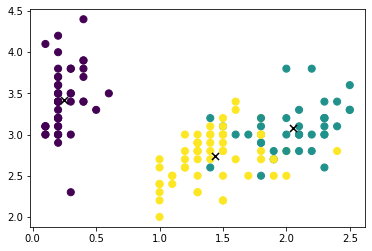

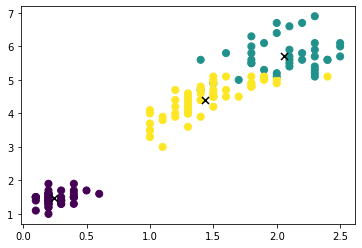

44.666666666666664


In [131]:
y=np.array(y)
    
clusters = len(np.unique(y))
x=np.array(df1)
# print(y)
m1,m2=x.shape
# print(x)
model = k_means(k=clusters, max_iter=150,data=df1,dist=eulcid_distance)
y_pred = model.algorithm(x)
# print(y_pred)
#k.plot()
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='viridis')
        plt.scatter(model.centroids[:,i],model.centroids[:,j],marker='x',s=50,color='black')#centroid plotting
        plt.show()

print(accuracy53(y,y_pred))


In [132]:
print(model.centroids)

[[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


Using the manhattan distance instead of euclidian distance

[[50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149], [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]


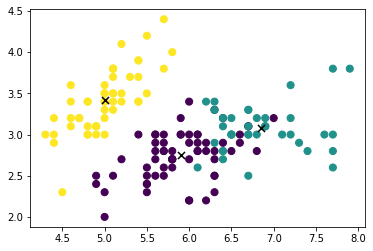

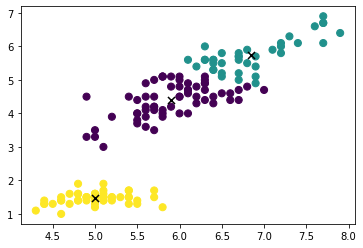

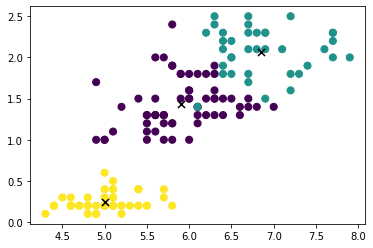

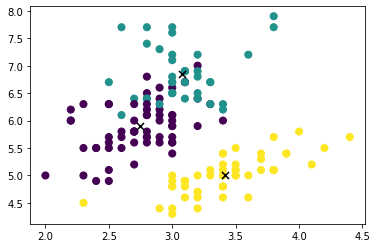

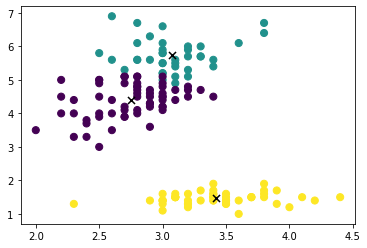

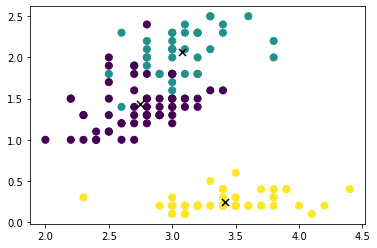

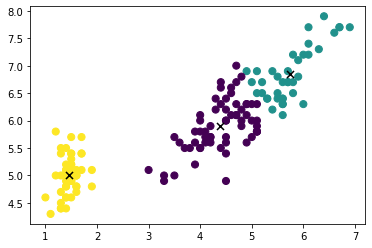

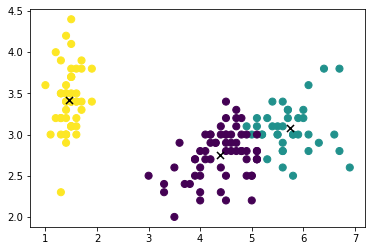

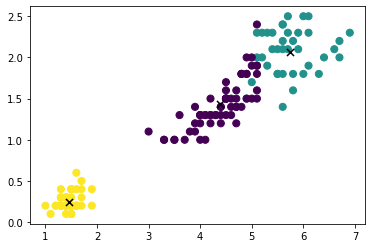

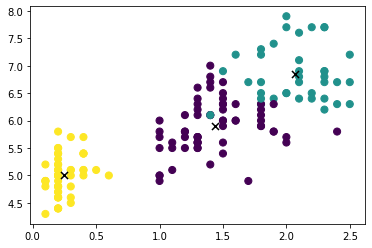

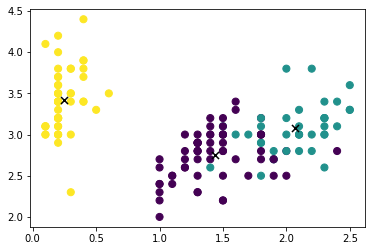

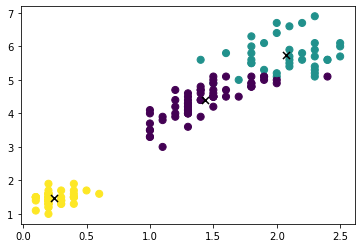

In [133]:
model2 = k_means(k=clusters, max_iter=150,data=df1,dist=manhattan_distance)
y_pred = model2.algorithm(x)
# print(y_pred)
#k.plot()
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='viridis')
        plt.scatter(model2.centroids[:,i],model2.centroids[:,j],marker='x',s=50,color='black')#centroid plotting
        plt.show()

FOR Different values of k


For K=4


[[53, 55, 57, 59, 60, 61, 62, 64, 66, 67, 69, 71, 79, 80, 81, 82, 84, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 106], [50, 51, 52, 54, 56, 58, 63, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 83, 85, 86, 91, 101, 103, 110, 111, 113, 114, 115, 116, 119, 121, 123, 126, 127, 128, 132, 133, 134, 137, 138, 141, 142, 145, 146, 147, 148, 149], [100, 102, 104, 105, 107, 108, 109, 112, 117, 118, 120, 122, 124, 125, 129, 130, 131, 135, 136, 139, 140, 143, 144], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
K=4


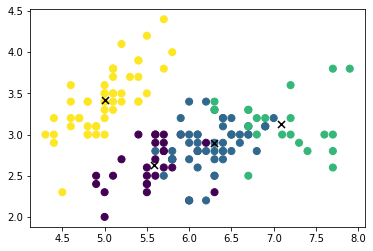

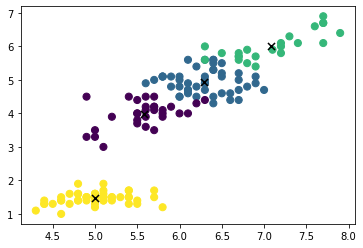

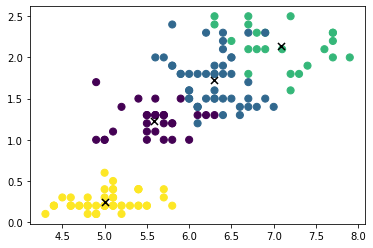

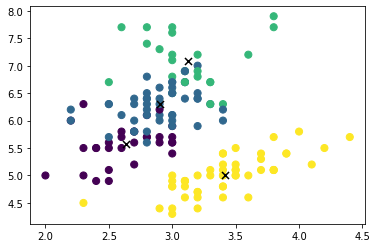

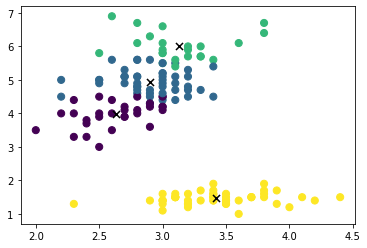

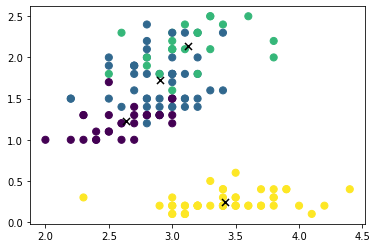

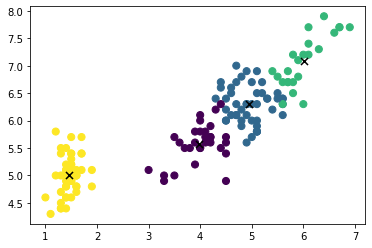

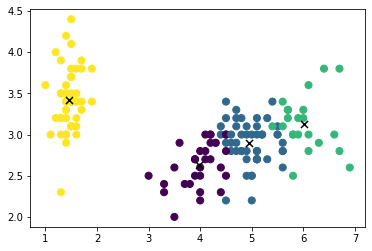

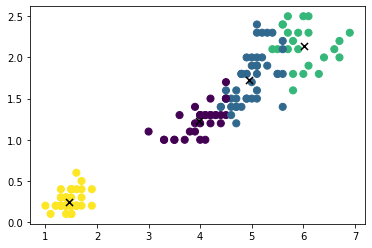

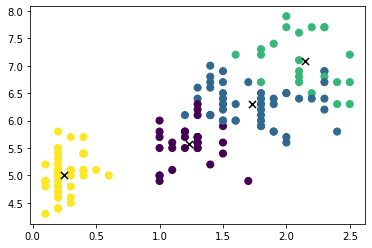

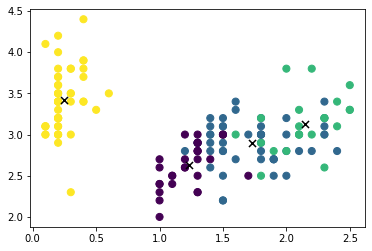

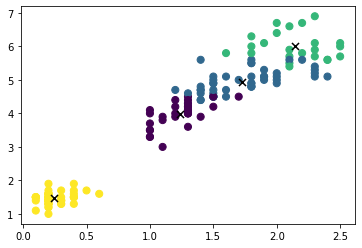

In [134]:
model = k_means(k=4, max_iter=150,data=df1)
y_pred = model.algorithm(x)
print("K=4")
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='viridis')
        plt.scatter(model.centroids[:,i],model.centroids[:,j],marker='x',s=50,color='black')
        plt.show()

FOR k=5

[[53, 55, 57, 59, 60, 61, 62, 64, 66, 67, 69, 71, 79, 80, 81, 82, 84, 88, 89, 90, 92, 93, 94, 95, 96, 98, 99, 106], [105, 107, 109, 117, 118, 122, 125, 130, 131, 135], [50, 51, 52, 54, 56, 58, 63, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 83, 85, 86, 87, 91, 97, 101, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149], [100, 102, 103, 104, 108, 110, 111, 112, 115, 116, 120, 124, 128, 129, 132, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
K=5


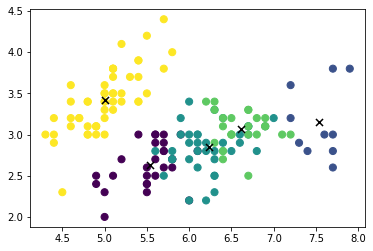

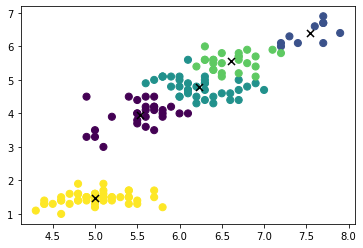

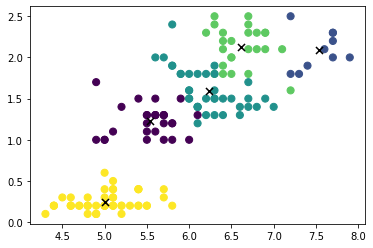

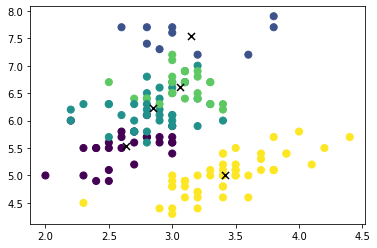

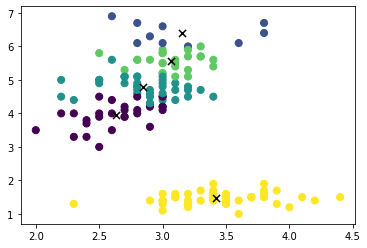

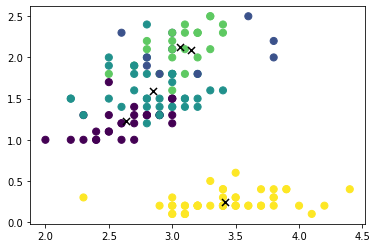

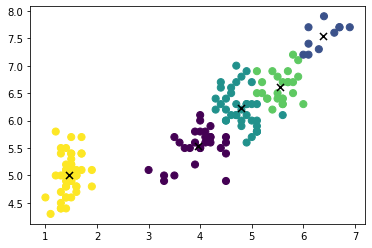

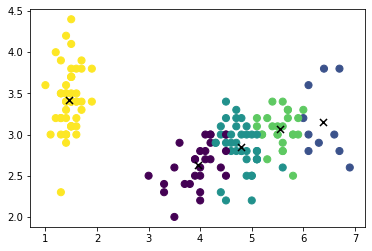

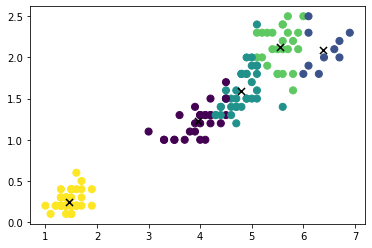

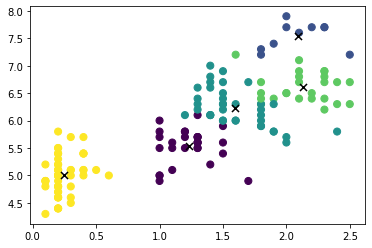

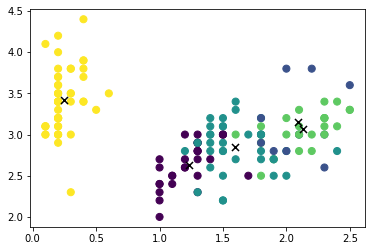

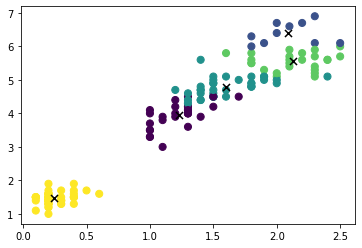

In [135]:
model = k_means(k=5, max_iter=150,data=df1)
y_pred = model.algorithm(x)
print("K=5")
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='viridis')
        plt.scatter(model.centroids[:,i],model.centroids[:,j],marker='x',s=50,color='black')
        plt.show()

FOR k=6 using euclidian distance

[[53, 55, 57, 59, 60, 61, 62, 64, 66, 67, 69, 71, 79, 80, 81, 82, 84, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 106], [50, 51, 52, 54, 56, 58, 63, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 83, 85, 86, 91, 101, 103, 110, 111, 113, 114, 115, 116, 119, 121, 123, 126, 127, 128, 132, 133, 134, 137, 138, 141, 142, 145, 146, 147, 148, 149], [5, 14, 15, 16, 18, 32, 33], [1, 2, 3, 6, 8, 9, 12, 13, 22, 25, 29, 30, 34, 35, 37, 38, 41, 42, 45, 47], [100, 102, 104, 105, 107, 108, 109, 112, 117, 118, 120, 122, 124, 125, 129, 130, 131, 135, 136, 139, 140, 143, 144], [0, 4, 7, 10, 11, 17, 19, 20, 21, 23, 24, 26, 27, 28, 31, 36, 39, 40, 43, 44, 46, 48, 49]]
K=6


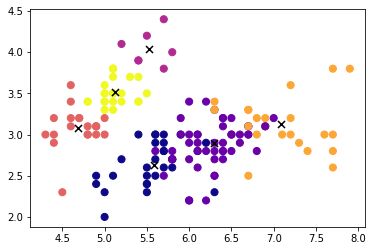

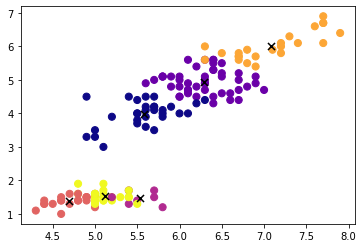

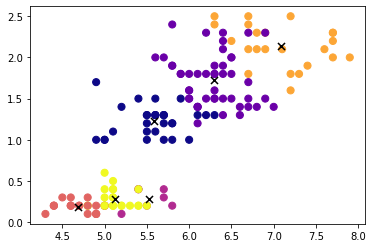

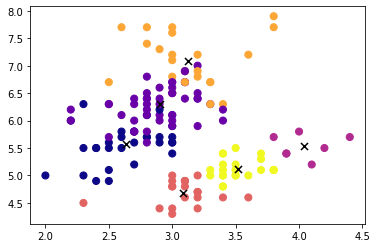

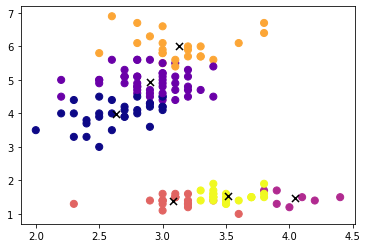

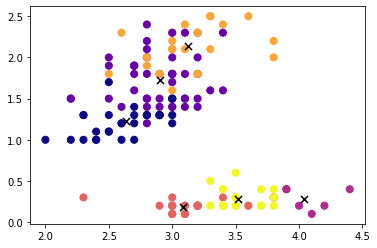

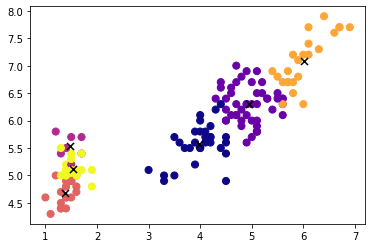

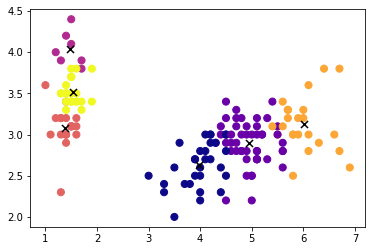

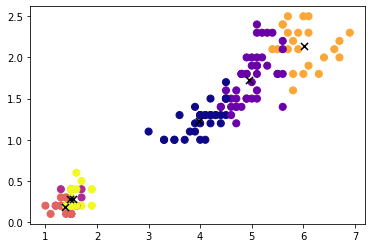

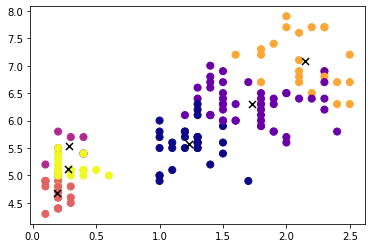

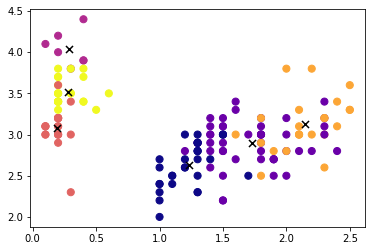

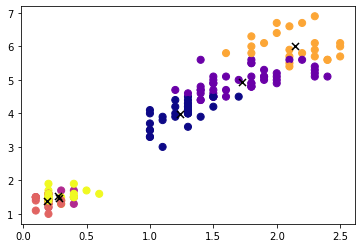

In [136]:
model = k_means(k=6, max_iter=150,data=df1)
y_pred = model.algorithm(x)
print("K=6")
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='plasma')
        plt.scatter(model.centroids[:,i],model.centroids[:,j],marker='x',s=50,color='black')
        plt.show()

For k=6 using manhattan distance

[[50, 52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], [2, 3, 6, 8, 12, 13, 22, 38, 42, 45, 47], [51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149], [41], [0, 1, 4, 7, 9, 11, 17, 23, 24, 25, 26, 27, 28, 29, 30, 34, 35, 37, 39, 40, 43, 49], [5, 10, 14, 15, 16, 18, 19, 20, 21, 31, 32, 33, 36, 44, 46, 48]]
K=6


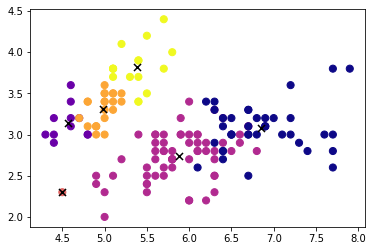

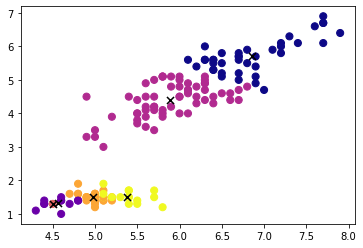

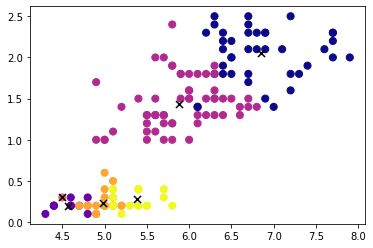

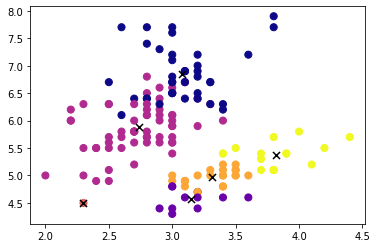

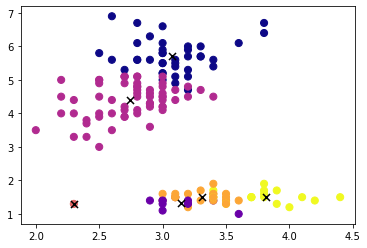

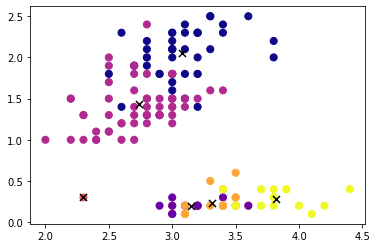

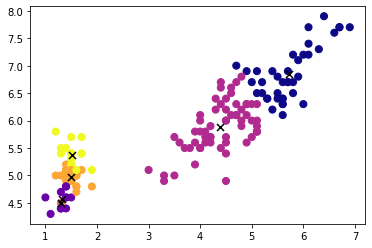

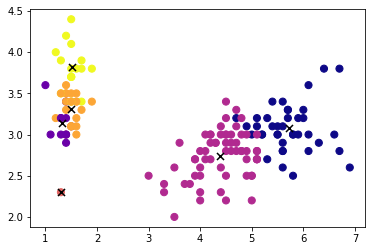

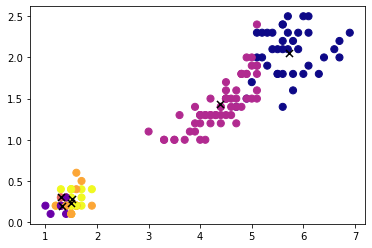

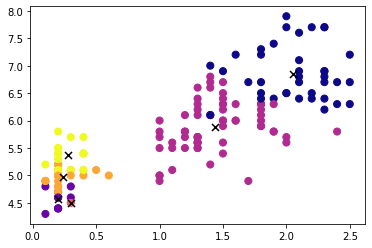

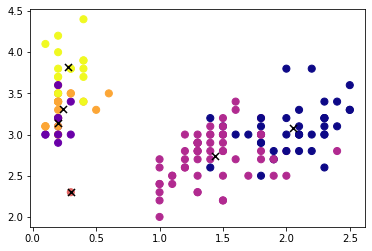

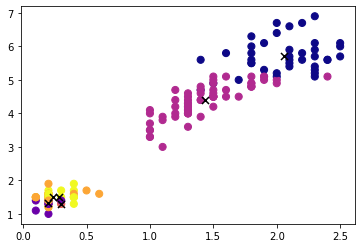

In [137]:
model = k_means(k=6, max_iter=150,data=df1,dist=manhattan_distance)
y_pred = model.algorithm(x)
print("K=6")
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='plasma')
        plt.scatter(model.centroids[:,i],model.centroids[:,j],marker='x',s=50,color='black')
        plt.show()

FOR k=10

[[1, 9, 11, 12, 24, 25, 29, 30, 34, 35, 37, 45], [100, 102, 103, 104, 105, 107, 108, 109, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 137, 139, 140, 141, 143, 144, 145, 148], [2, 3, 6, 8, 13, 22, 38, 42, 47], [10, 20, 27, 31, 36, 48], [50, 51, 52, 54, 56, 58, 63, 65, 66, 68, 70, 72, 73, 74, 75, 76, 77, 78, 83, 85, 86, 87, 91, 97, 101, 110, 111, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 147, 149], [14, 15, 18, 33], [53, 55, 57, 59, 60, 61, 62, 64, 67, 69, 71, 79, 80, 81, 82, 84, 88, 89, 90, 92, 93, 94, 95, 96, 98, 99, 106], [5, 16, 19, 21, 32, 44, 46], [0, 4, 7, 17, 23, 26, 28, 39, 40, 43, 49], [41]]
K=10


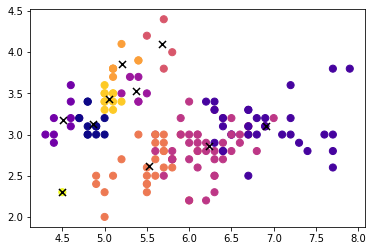

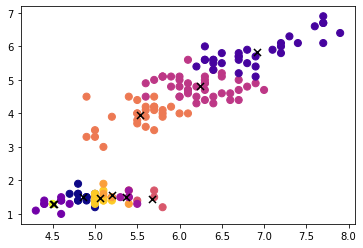

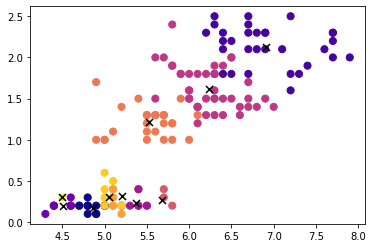

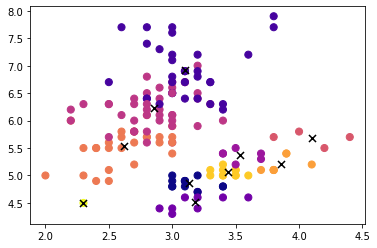

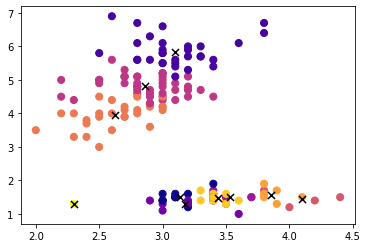

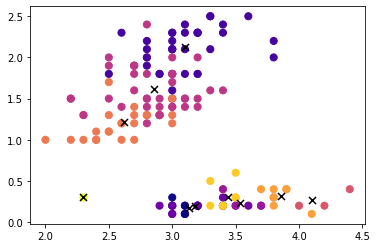

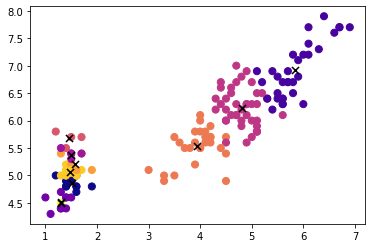

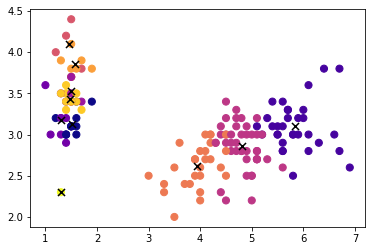

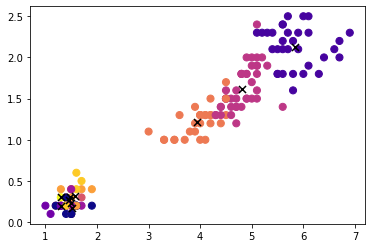

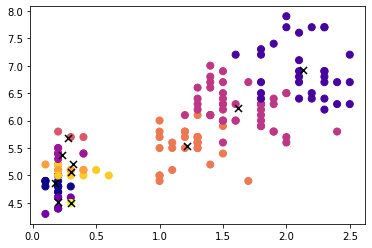

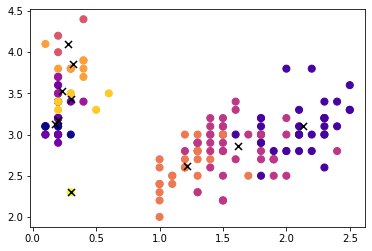

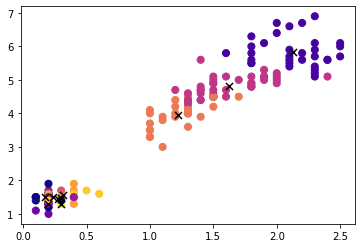

In [138]:
model = k_means(k=10, max_iter=150,data=df1)
y_pred = model.algorithm(x)
print("K=10")
for i in range(m2):
    for j in range(m2):
        if i==j:
            continue
        plt.scatter(x[:,i],x[:,j],c=y_pred,s=50,cmap='plasma')
        plt.scatter(model.centroids[:,i],model.centroids[:,j],marker='x',s=50,color='black')
        plt.show()

This model will show less accuracy as it does not define the actual predictions for cluster's class, It just divide them into clusters but running it multiple time accuracy may increase as one of the permutations contains the right order of classes in the clusters.
Copyright - Mayank Raj(B19CSE053)